In [1]:
#import our dependencies
#NumPy for our matrices opeartions, Pandas for our dataset and MatplotLib for graphs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Now we load our dataset which has already been divide into two parts.

train_dataset = pd.read_csv("Train_Dataset_for_MLR.txt")
test_dataset = pd.read_csv('Test_Dataset_for_MLR.txt')

In [3]:
#Now let's take a look at what our dataset looks like
train_dataset.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [4]:
#now I drop the unwanted column which includes Unnamed:0 and Id
train_dataset = train_dataset.drop(['Unnamed: 0', 'Id'], axis=1)
test_dataset = test_dataset.drop(['Unnamed: 0', 'Id'], axis=1)

In [5]:
# now seperate the features (X) from the Target (Y) for both train and test dataset
train_dataset_value = train_dataset.values
target = train_dataset_value[:,-1].reshape(train_dataset_value.shape[0],1)
features = train_dataset_value[:, :-1]

In [6]:
test_dataset_value = test_dataset.values
test_target = test_dataset_value[:,-1].reshape(test_dataset_value.shape[0],1)
test_features = test_dataset_value[:, :-1]

In [7]:
#now lets see what our dataset looks like
print("The shape of our` Y dataset is ",target.shape)
print("The shape of our` X dataset is ",features.shape)
print("The shape of our` Y-test dataset is ",test_target.shape)
print("The shape of our` X-test dataset is ",test_features.shape)

The shape of our` Y dataset is  (1200, 1)
The shape of our` X dataset is  (1200, 69)
The shape of our` Y-test dataset is  (258, 1)
The shape of our` X-test dataset is  (258, 69)


## MULTIPLE LINEAR REGRESSION

when doing a regression we have to consider a few factors which include:

**Straight Line**
this involves using the matrix multiplication which is given as __predicted_traget = matrix_mul(features, theta)__


*Cost Function

*Gradient Descent

So let's make our linear regression model in python.



In [9]:
#To do a proper matrix multiplication of features and theta, we will need to add a column of 1s before all the features
#reason? theta0 will need to be multiplied on all levels

features = np.vstack((np.ones((features.shape[0], )), features.T)).T
test_features = np.vstack((np.ones((test_features.shape[0], )), test_features.T)).T

1. I'm taking four parameters features, target, Learning_Rate (which is alpha) and Iterations. Iterations specifies how many times we want to run the loop.
2. Define m as the size of the dataset (which is currently 1200).
3. And theta will be the vector of zeros. so it will be a matrix of size (n,1) where n is the number of features. so basically of the size (69, 1)
4. We are running the loop for iteration time. And in every iteration we will compute our above 4 equations.
5. We will also keep track of our cost at every iteration, by maintaining a cost_list.
6. And finally, return the theta parameter (which will be trained) and cost_list.

In [11]:
def model(features, target, Learning_Rate, Iterations):
    m = target.size
    theta = np.zeros((features.shape[1], 1))
    cost_list = []
    for i in range(Iterations):
        
        predicted_traget = np.dot(features, theta)
        
        Cost_Function = (1/(2*m)) * np.sum(np.square(predicted_traget - target))
        d_theta = (1/m) * np.dot(features.T, predicted_traget-target)
        theta = theta - Learning_Rate * d_theta
        
        cost_list.append(Cost_Function)
        # to print the cost function for 10 times
        
        if(i%(Iterations/10) == 0):
            print("Cost is :", Cost_Function)
    return theta, cost_list

In [13]:
#now let's call our model
iterat = 10000
learn_rate = 0.000000005
theta, cost_list = model(features, target, Learning_Rate= learn_rate, Iterations=iterat)

Cost is : 72.37539364066856
Cost is : 0.02790416573121623
Cost is : 0.017251065480335014
Cost is : 0.016355273044044497
Cost is : 0.016158836450446166
Cost is : 0.016040958865448277
Cost is : 0.015946827691724886
Cost is : 0.01586789668503626
Cost is : 0.01580056838171381
Cost is : 0.01574235567203411


We can see our cost decreasing with every iteration. We can also plot a graph of cost vs iteration

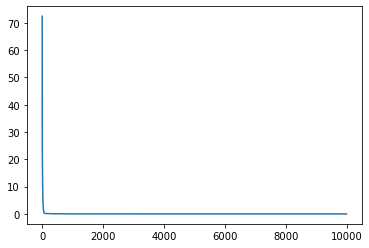

In [14]:
rang = np.arange(0, iterat)
plt.plot(rang, cost_list)
plt.show()

## Testing the Model

We will test the accuracy of our model on a test dataset. And for testing accuracy, I'm going to calculate the error, and subtract the 1 by error, to get the accuracy. Below is the equation for the error :

error = (1/m) * ∑|y_pred−Y|

In [15]:
predicted_target = np.dot(test_features, theta)
error = (1/test_features.shape[0]) * np.sum(np.abs(predicted_target - test_target))

In [16]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 12.95765899497286 %
Test Accuracy is : 87.04234100502714 %
